In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

In [7]:
  df = pd.read_csv('Downloads/Iris.csv')

In [8]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [10]:
df.shape

(150, 6)

In [11]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [16]:
#droping unneccesary columns
df.drop(columns = "Id", inplace = True)

In [17]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
print(df["Species"].nunique())
df["Species"].unique()

3


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

SepalLengthCm       Axes(0.125,0.11;0.168478x0.77)
SepalWidthCm     Axes(0.327174,0.11;0.168478x0.77)
PetalLengthCm    Axes(0.529348,0.11;0.168478x0.77)
PetalWidthCm     Axes(0.731522,0.11;0.168478x0.77)
dtype: object

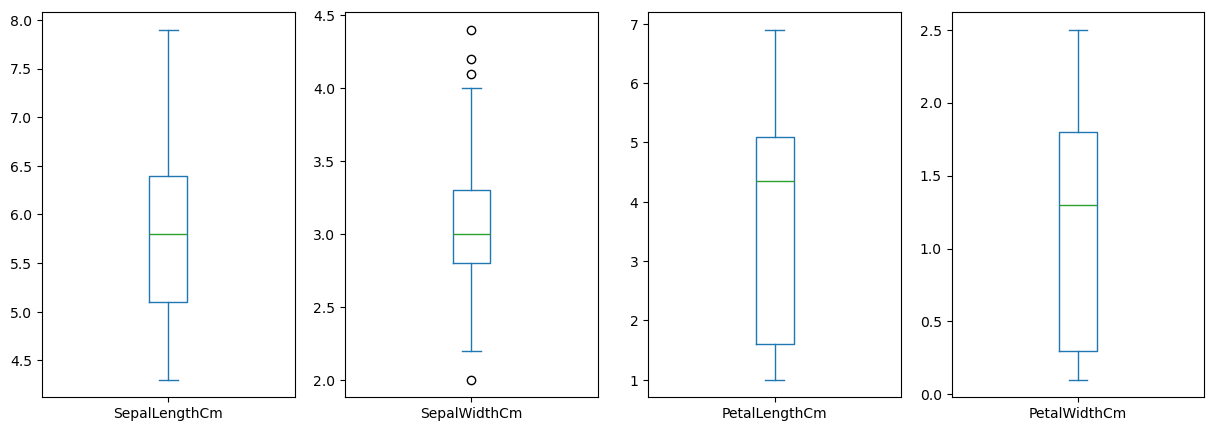

In [20]:
df.plot(kind='box', subplots=True, sharey=False, figsize=(15, 5))

In [21]:
# Detection of Outliers
IQR = df['SepalWidthCm'].quantile(0.75) - df['SepalWidthCm'].quantile(0.25) # IQR - Inter quartile range IQR = Q3-Q1
lower_limit = df['SepalWidthCm'].quantile(0.25) - (IQR * 1.5) # Q1 - 1.5 * IQR
upper_limit = df['SepalWidthCm'].quantile(0.75) + (IQR * 1.5) # Q3 + 1.5 * IQR

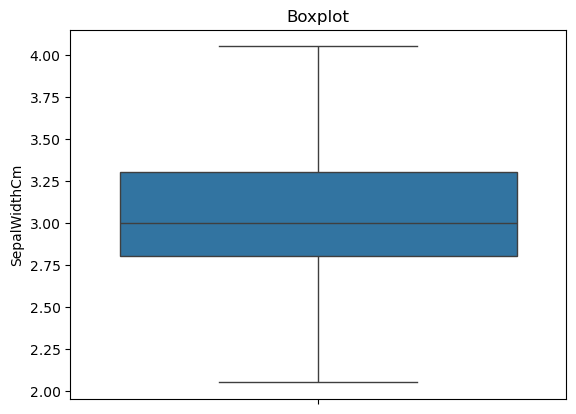

In [22]:
# Now let's replace the outliers by the maximum and minimum limit
df['SepalWidthCm']= pd.DataFrame(np.where(df['SepalWidthCm'] > upper_limit, upper_limit,
                                         np.where(df['SepalWidthCm'] < lower_limit, lower_limit,
                                                  df['SepalWidthCm'])))
                                 
sns.boxplot(df['SepalWidthCm']);plt.title('Boxplot');plt.show()

SepalLengthCm       Axes(0.125,0.11;0.168478x0.77)
SepalWidthCm     Axes(0.327174,0.11;0.168478x0.77)
PetalLengthCm    Axes(0.529348,0.11;0.168478x0.77)
PetalWidthCm     Axes(0.731522,0.11;0.168478x0.77)
dtype: object

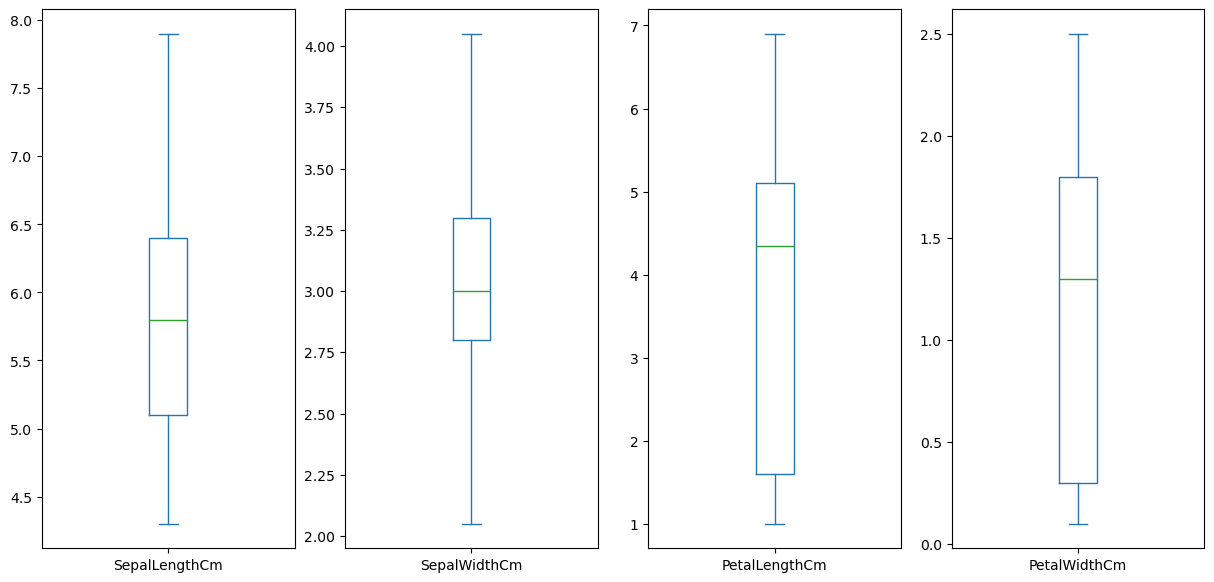

In [23]:
df.plot(kind='box', subplots=True, sharey=False, figsize=(15, 7))

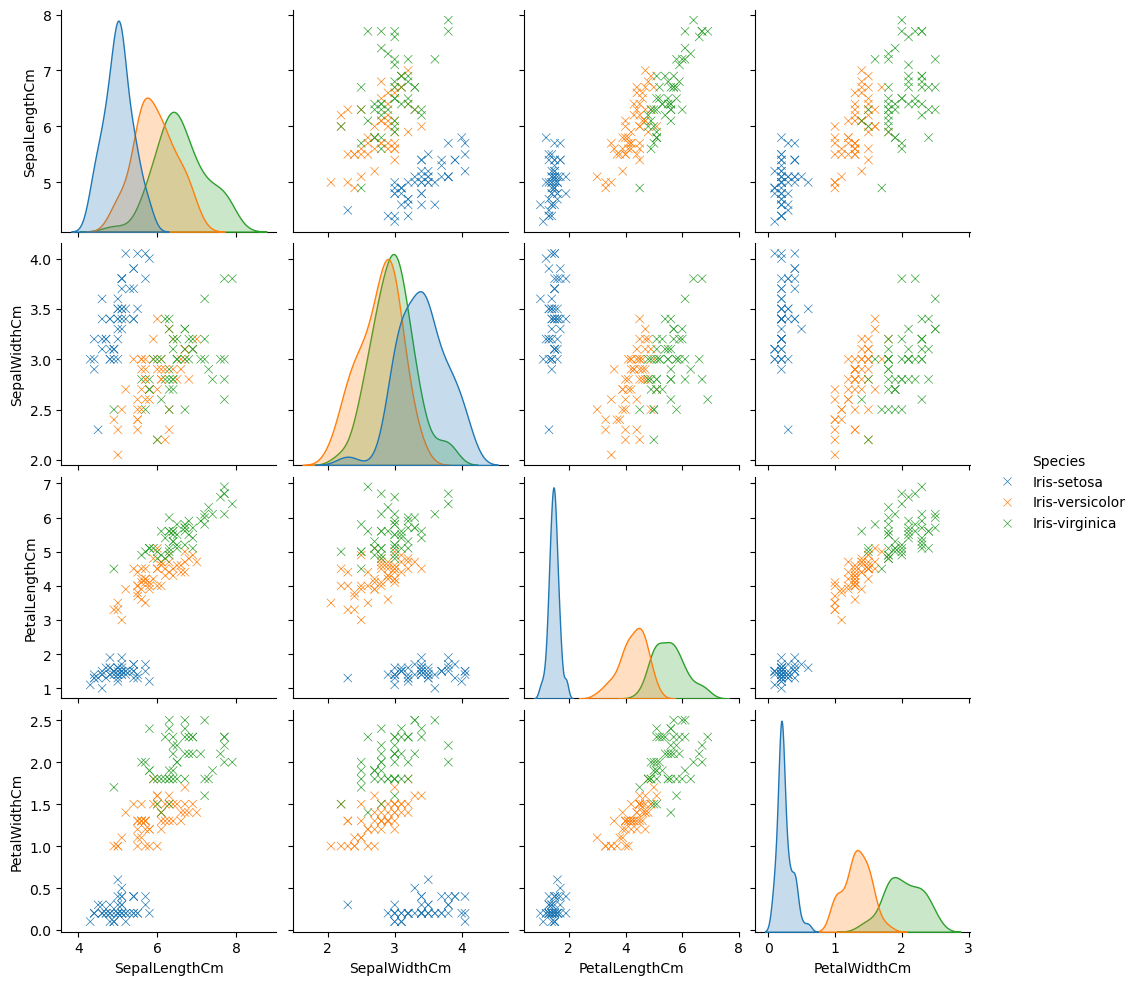

In [24]:
sns.pairplot(df, hue = "Species", markers ="x")

In [25]:
numeric_iris = df.drop("Species", axis = 1)
numeric_iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


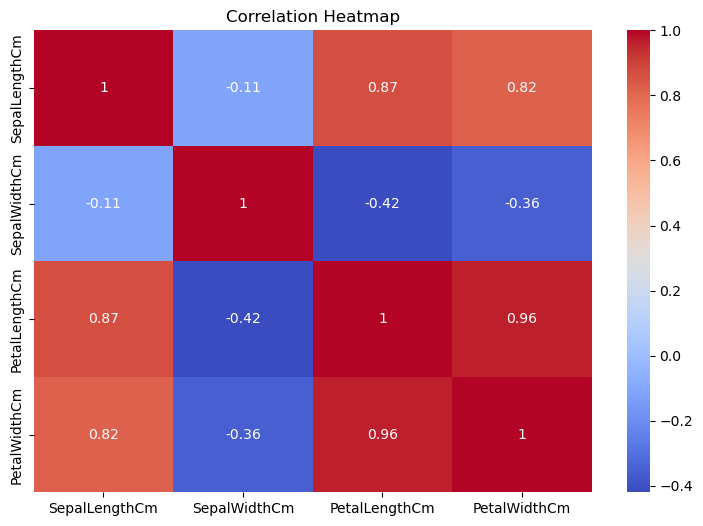

In [26]:
# Calculate the correlation matrix
correlation_matrix = numeric_iris.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [27]:
# Calculate the value counts of the "species" column
species_counts = df["Species"].value_counts()
species_counts

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

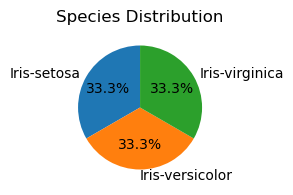

In [28]:
species_counts = df["Species"].value_counts()
# Create a pie chart
plt.figure(figsize=(2, 6))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Species Distribution")
plt.show()

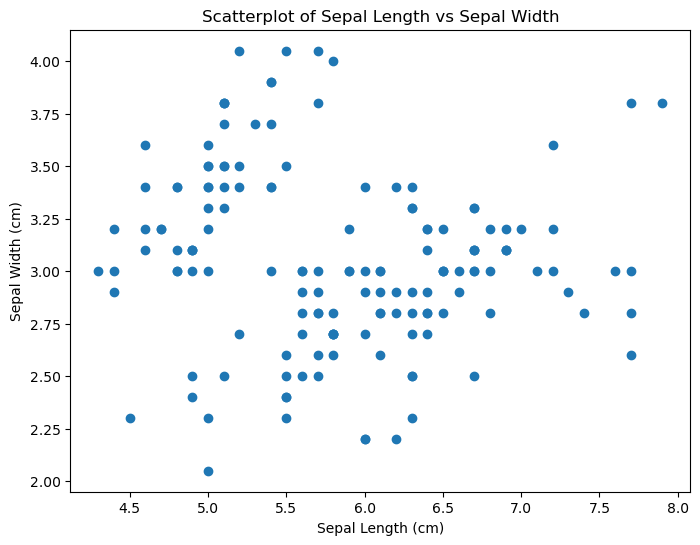

In [29]:
# Create a scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'])
plt.title("Scatterplot of Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

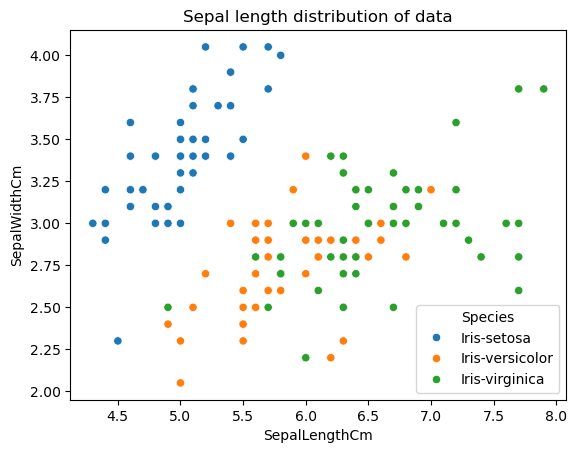

In [30]:
sns.scatterplot(x=df['SepalLengthCm'], y=df['SepalWidthCm'], hue = df["Species"])
plt.title("Sepal length distribution of data")
plt.show()

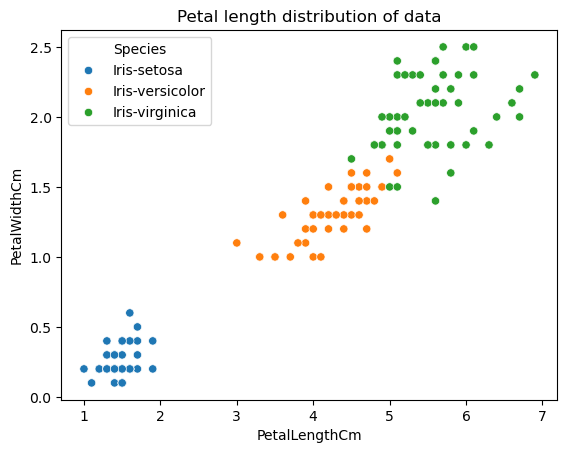

In [31]:
sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm", data=df, hue="Species")
plt.title("Petal length distribution of data")
plt.show()

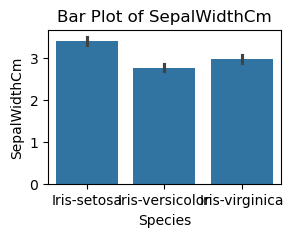

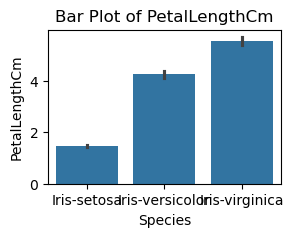

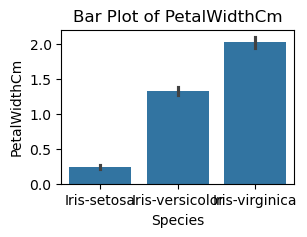

In [32]:
numeric_columns = df.columns[1:-1]
# Create bar plots for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(3, 2))
    sns.barplot(x="Species", y=column, data=df)
    plt.title(f"Bar Plot of {column}")
    plt.xlabel("Species")
    plt.ylabel(column)
    plt.show()

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Species"]= le.fit_transform(df["Species"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [34]:
df["Species"].unique()

array([0, 1, 2])

In [35]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

In [36]:
x = df.iloc[:, [0,1,2,3]]
print(x.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


In [37]:
y = df.iloc[:, -1]
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64


In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2, random_state=0)

In [39]:
x_train


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2
127,6.1,3.0,4.9,1.8
132,6.4,2.8,5.6,2.2
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


In [40]:
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
114,5.8,2.80,5.1,2.4
62,6.0,2.20,4.0,1.0
33,5.5,4.05,1.4,0.2
107,7.3,2.90,6.3,1.8
7,5.0,3.40,1.5,0.2
100,6.3,3.30,6.0,2.5
40,5.0,3.50,1.3,0.3
86,6.7,3.10,4.7,1.5
76,6.8,2.80,4.8,1.4
71,6.1,2.80,4.0,1.3


In [41]:
y_train


137    2
84     1
27     0
127    2
132    2
      ..
9      0
103    2
67     1
117    2
47     0
Name: Species, Length: 120, dtype: int64

In [42]:
y_train


137    2
84     1
27     0
127    2
132    2
      ..
9      0
103    2
67     1
117    2
47     0
Name: Species, Length: 120, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [44]:
print(x.head());print(y.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64


In [45]:
lmodel = LogisticRegression(max_iter=1000, random_state=42)
lmodel.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [46]:
y_pred = lmodel.predict(x_test)

In [47]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [48]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

Accuracy: 1.0
Confusion Matrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [50]:
y = df.iloc[:, -1]
x = df.iloc[:, [0,1,2,3]]

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [52]:
rmodel = RandomForestClassifier(n_estimators=100, random_state=42)
rmodel.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [53]:
y_pred = rmodel.predict(x_test)

In [54]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [56]:
dmodel = DecisionTreeClassifier(random_state=42)
dmodel.fit(x_train, y_train)
# Make predictions on the test set
y_pred = dmodel.predict(x_test)

In [57]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [58]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [59]:
# Create and train a Support Vector Machine (SVM) classifier
smodel = SVC(kernel='linear', C=1, random_state=42)
smodel.fit(x_train, y_train)

# Make predictions on the test set
y_pred = smodel.predict(x_test)

In [60]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [62]:
# Create and train a k-Nearest Neighbors (KNN) classifier
kmodel = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors (k) as needed
kmodel.fit(x_train, y_train)

# Make predictions on the test set
y_pred = kmodel.predict(x_test)

In [63]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [64]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [65]:
# Create and train a Gaussian Naive Bayes classifier
nmodel = GaussianNB()
nmodel.fit(x_train, y_train)

# Make predictions on the test set
y_pred = nmodel.predict(x_test)

In [66]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [67]:
# Input data
input_data = (2.9, 3.1, 4.1, 5.2)

# Reshape the input data
input_data_reshaped = [input_data]

# Make predictions using each model
prediction1 = dmodel.predict(input_data_reshaped)
prediction2 = nmodel.predict(input_data_reshaped)
prediction3 = kmodel.predict(input_data_reshaped)
prediction4 = smodel.predict(input_data_reshaped)
prediction5 = rmodel.predict(input_data_reshaped)
prediction6 = lmodel.predict(input_data_reshaped)

# Print the predictions for each model
print("Decision Tree prediction:", prediction1[0])
print("Naive Bayes prediction:", prediction2[0])
print("k-Nearest Neighbors prediction:", prediction3[0])
print("Support Vector Machine prediction:", prediction4[0])
print("Random Forest prediction:", prediction5[0])
print("Logistic Regression prediction:", prediction6[0])

Decision Tree prediction: 2
Naive Bayes prediction: 2
k-Nearest Neighbors prediction: 2
Support Vector Machine prediction: 2
Random Forest prediction: 2
Logistic Regression prediction: 2


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib